In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


# 1. Linear Regression

Coefficient:  [28.67684216]
Intercept:  -2.088699766134101


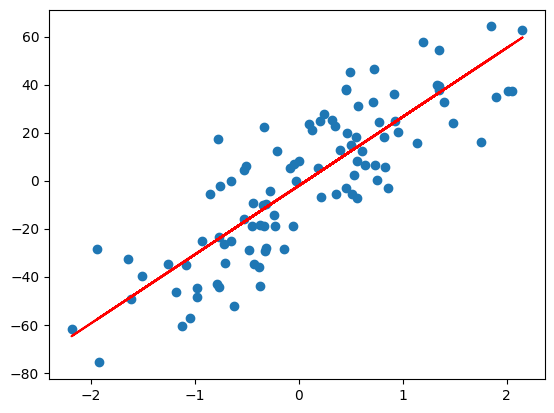

In [22]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1,n_targets=1,noise=20, random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)

print('Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

plt.plot(X, reg.predict(X), color='r')

# 2. Lasso Regression (L2 Regularization)

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 7.705e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

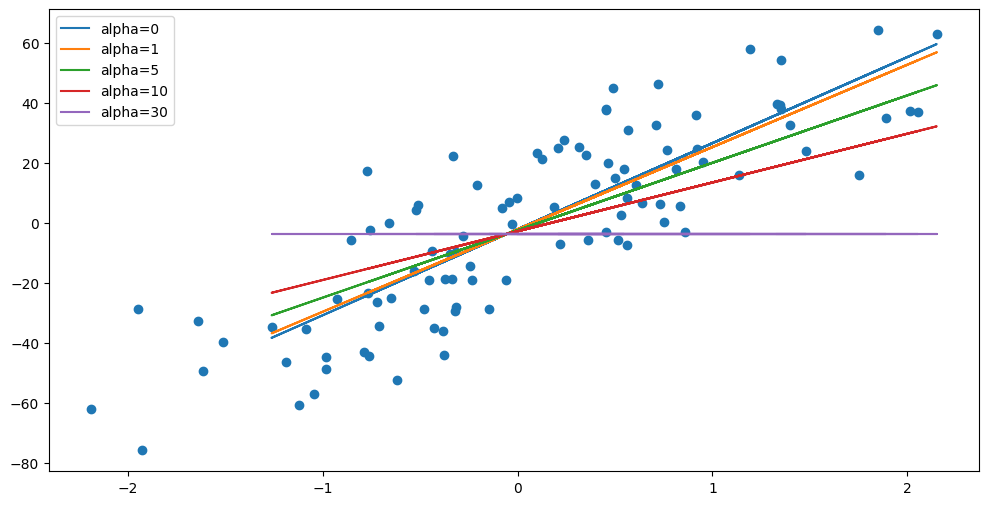

In [24]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    l = Lasso(alpha=i)
    l.fit(X_train,y_train)
    plt.plot(X_test, l.predict(X_test), label='alpha={}'.format(i))
plt.legend()
plt.show()

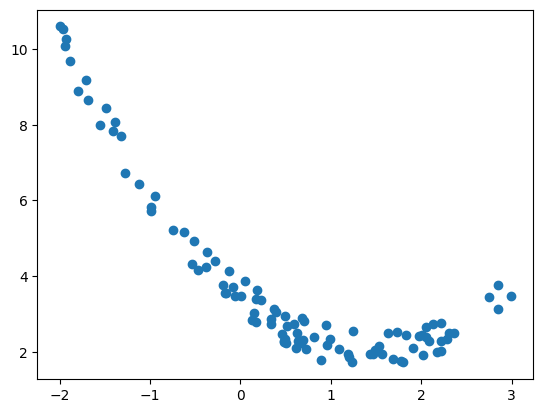

In [33]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1+3+np.random.rand(m,1)

plt.scatter(x1,x2)
plt.show()

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.183e+00, tolerance: 5.420e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

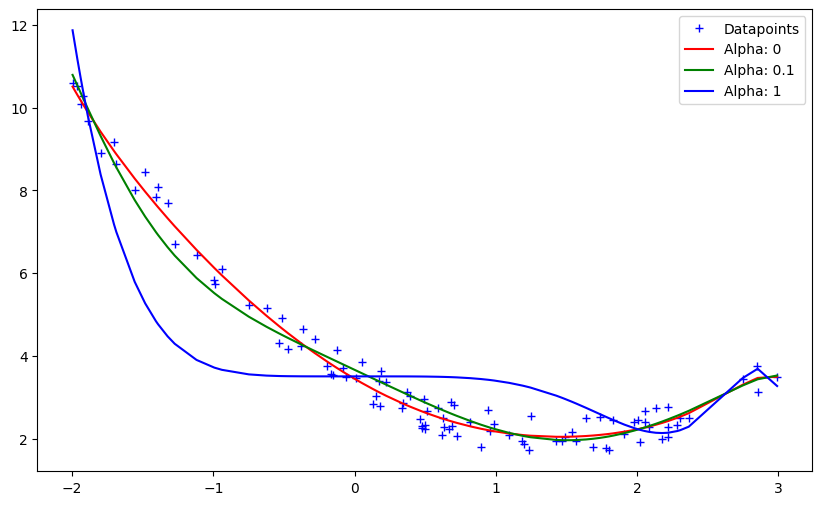

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_lasso(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,0.1,1]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()